In [1]:
import pandas as pd
import matplotlib as plt
%matplotlib inline

In [2]:
# importing modules
df_yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')

In [3]:
new_index = (df_yearly.index + 1)
df_yearly.set_index(new_index, inplace=True)

In [4]:
df_yearly

,year,births,deaths,clinic
1,1841,3036,237,clinic 1
2,1842,3287,518,clinic 1
3,1843,3060,274,clinic 1
4,1844,3157,260,clinic 1
5,1845,3492,241,clinic 1
6,1846,4010,459,clinic 1
7,1841,2442,86,clinic 2
8,1842,2659,202,clinic 2
9,1843,2739,164,clinic 2
10,1844,2956,68,clinic 2


# 2. The alarming number of deaths
The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846. You'll notice that giving birth was very dangerous; an alarming number of women died as the result of childbirth, most of them from childbed fever.

We see this more clearly if we look at the proportion of deaths out of the number of women giving birth. Let's zoom in on the proportion of deaths at Clinic 1.

In [5]:
df_yearly['proportion_deaths'] = df_yearly['deaths']/df_yearly['births']
df_yearly

,year,births,deaths,clinic,proportion_deaths
1,1841,3036,237,clinic 1,0.078063
2,1842,3287,518,clinic 1,0.157591
3,1843,3060,274,clinic 1,0.089542
4,1844,3157,260,clinic 1,0.082357
5,1845,3492,241,clinic 1,0.069015
6,1846,4010,459,clinic 1,0.114464
7,1841,2442,86,clinic 2,0.035217
8,1842,2659,202,clinic 2,0.075968
9,1843,2739,164,clinic 2,0.059876
10,1844,2956,68,clinic 2,0.023004


In [6]:
# Extract clinic 1 data into yearly1 and clinic 2 data into yearly2
yearly1 = df_yearly[df_yearly['clinic']=='clinic 1']
yearly2 = df_yearly[df_yearly['clinic']=='clinic 2']

In [7]:
# Print out yearly1
yearly1

,year,births,deaths,clinic,proportion_deaths
1,1841,3036,237,clinic 1,0.078063
2,1842,3287,518,clinic 1,0.157591
3,1843,3060,274,clinic 1,0.089542
4,1844,3157,260,clinic 1,0.082357
5,1845,3492,241,clinic 1,0.069015
6,1846,4010,459,clinic 1,0.114464


# 3. Death at the clinics
If we now plot the proportion of deaths at both clinic 1 and clinic 2 we'll see a curious pattern...

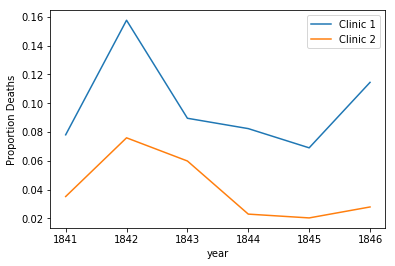

In [10]:
ax = yearly1.plot(x='year',y='proportion_deaths',label='Clinic 1')
yearly2.plot(x='year',y='proportion_deaths', label='Clinic 2', ax=ax)
ax.set_ylabel("Proportion Deaths")

# 4. The handwashing begins
Why is the proportion of deaths constantly so much higher in Clinic 1? Semmelweis saw the same pattern and was puzzled and distressed. The only difference between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses.

Semmelweis started to suspect that something on the corpses, spread from the hands of the medical students, caused childbed fever. So in a desperate attempt to stop the high mortality rates, he decreed: Wash your hands! This was an unorthodox and controversial request, nobody in Vienna knew about bacteria at this point in time.

Let's load in monthly data from Clinic 1 to see if the handwashing had any effect.


In [11]:
# Read datasets/monthly_deaths.csv into monthly
monthly = pd.read_csv('datasets/monthly_deaths.csv', parse_dates =['date'])

In [12]:
# Calculate proportion of deaths per no. births
monthly["proportion_deaths"] = monthly['deaths']/monthly['births']

In [13]:
#Print out the first rows in monthly
monthly.head(1)

,date,births,deaths,proportion_deaths
0,1841-01-01,254,37,0.145669


# 5. The effect of handwashing
With the data loaded we can now look at the proportion of deaths over time. In the plot below we haven't marked where obligatory handwashing started, but it reduced the proportion of deaths to such a degree that you should be able to spot it!



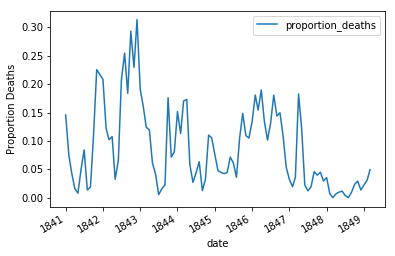

In [14]:
# Plot monthly proportion of deaths
ax = monthly.plot(x='date',y='proportion_deaths')
ax.set_ylabel("Proportion Deaths")

# 6. The effect of handwashing highlighted
Starting from the summer of 1847 the proportion of deaths is drastically reduced and, yes, this was when Semmelweis made handwashing obligatory.

The effect of handwashing is made even more clear if we highlight this in the graph.

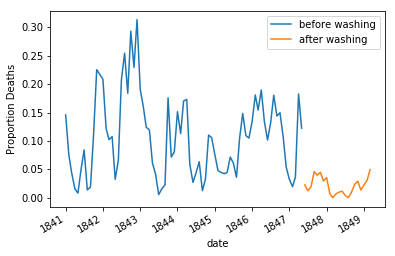

In [15]:
import pandas as pd
handwashing_start = pd.to_datetime('1847-06-01')

# Split monthly into before and after handwashing_start
before_washing = monthly[monthly['date'] < handwashing_start]
after_washing = monthly[monthly['date'] >= handwashing_start]

# Plot monthly proportion of deaths before and after handwashing
ax = before_washing.plot(x='date',y='proportion_deaths',label='before washing')
after_washing.plot(x='date',y='proportion_deaths', label ='after washing',ax=ax)
ax.set_ylabel("Proportion Deaths")

# 7. More handwashing, fewer deaths?
Again, the graph shows that handwashing had a huge effect. How much did it reduce the monthly proportion of deaths on average?

In [16]:
# Difference in mean monthly proportion of deaths due to handwashing
before_proportion = before_washing['proportion_deaths']
after_proportion =after_washing['proportion_deaths']
mean_diff = (after_proportion).mean()-(before_proportion).mean()
mean_diff 

-0.08395660751183336

# 8. A Bootstrap analysis of Semmelweis handwashing data¶
It reduced the proportion of deaths by around 8 percentage points! From 10% on average to just 2% (which is still a high number by modern standards).

To get a feeling for the uncertainty around how much handwashing reduces mortalities we could look at a confidence interval (here calculated using the bootstrap method).

In [17]:
# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac = 1, replace=True)
    boot_after = after_proportion.sample(frac = 1, replace=True)
    boot_mean_diff.append(boot_after.mean() - boot_before.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval =  pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval


0.025   -0.101104
0.975   -0.067767
dtype: float64

# 9. The fate of Dr. Semmelweis
So handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. All in all, it would seem that Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.

The tragedy is that, despite the evidence, Semmelweis' theory — that childbed fever was caused by some "substance" (what we today know as bacteria) from autopsy room corpses — was ridiculed by contemporary scientists. The medical community largely rejected his discovery and in 1849 he was forced to leave the Vienna General Hospital for good.

One reason for this was that statistics and statistical arguments were uncommon in medical science in the 1800s. Semmelweis only published his data as long tables of raw data, but he didn't show any graphs nor confidence intervals. If he would have had access to the analysis we've just put together he might have been more successful in getting the Viennese doctors to wash their hands.

In [18]:
# The data Semmelweis collected points to that:
doctors_should_wash_their_hands = True